# Mixed data SAM generator
Application on the Mushroom dataset.

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from sys import path

generator_dir = '../generators/'
utils_dir = '../data_manager/'
path.append(generator_dir)
path.append(utils_dir)

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
mush_df = pd.read_csv('../data/mushrooms/mushrooms.data', header=None, sep=" ")
#adult_df = pd.DataFrame(scale(adult_df), columns=['Feature {}'.format(i) for i in range(4)])
print(mush_df.shape)

mush_df.head()


(8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#adult_df.iloc[:,:5].hist()

In [11]:
from csam import SAM
sam = SAM(nh=10, dnh=50, lr=0.01, dlr=.01, batchsize=-1, train_epochs=200, test_epochs=200)
sam.predict(mush_df,categorical_variables=[True for i in range(len(mush_df.columns))], nruns=1, gpus=1)

../generators/csam.py:142: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(self.layers(self.filter(x)))


22 Epoch: 0 -- Disc: 1.3968582153320312 -- Gen: 0.6736580807229747 -- L1: 50.60000228881836
22 Epoch: 20 -- Disc: 1.3863766193389893 -- Gen: 0.6915334203968877 -- L1: 40.48001480102539
22 Epoch: 40 -- Disc: 1.3862724304199219 -- Gen: 0.6942634582519531 -- L1: 30.360021591186523
22 Epoch: 60 -- Disc: 1.386319637298584 -- Gen: 0.6936353600543478 -- L1: 20.240020751953125
22 Epoch: 80 -- Disc: 1.3861944675445557 -- Gen: 0.693351123643958 -- L1: 10.120006561279297
22 Epoch: 100 -- Disc: 1.38553786277771 -- Gen: 0.6929865298063859 -- L1: 0.004894264042377472
22 Epoch: 120 -- Disc: 1.3772082328796387 -- Gen: 0.6926500486290973 -- L1: 0.5057212114334106
22 Epoch: 140 -- Disc: 1.3327711820602417 -- Gen: 0.7411544633948285 -- L1: 0.12906603515148163
22 Epoch: 160 -- Disc: 1.2795803546905518 -- Gen: 0.7700961569081182 -- L1: 0.2152017205953598
22 Epoch: 180 -- Disc: 1.2780842781066895 -- Gen: 0.9147559456203295 -- L1: 0.5412546992301941
22 Epoch: 200 -- Disc: 1.2453131675720215 -- Gen: 0.8811529

array([[0.        , 0.00133954, 0.00124931, 0.00898019, 0.00896695,
        0.09946452, 0.00155444, 0.01331744, 0.01760777, 0.05933779,
        0.00171873, 0.01523121, 0.0011723 , 0.01815812, 0.00846865,
        0.01137196, 0.0050333 , 0.00126946, 0.00678293, 0.00678736,
        0.02061869, 0.01582899, 0.01458647],
       [0.01503418, 0.        , 0.00142049, 0.00318416, 0.0050873 ,
        0.0076121 , 0.0015541 , 0.00273578, 0.02333191, 0.0040944 ,
        0.02405502, 0.00678698, 0.00147439, 0.00275562, 0.00441163,
        0.00439448, 0.0012058 , 0.00158797, 0.00373413, 0.01712278,
        0.00347333, 0.00423917, 0.00480168],
       [0.01626365, 0.00051901, 0.        , 0.00481726, 0.0108012 ,
        0.00864232, 0.00150456, 0.00419206, 0.00702844, 0.0063683 ,
        0.01250282, 0.0091461 , 0.00095985, 0.01044494, 0.01140485,
        0.01495718, 0.00265975, 0.00155438, 0.00576286, 0.01320068,
        0.00625391, 0.00706424, 0.01095379],
       [0.01495551, 0.00236457, 0.00131607, 0.   

In [12]:
gdata = sam.generate(mush_df, [True for i in range(len(mush_df.columns))], gpu=True) 


../generators/csam.py:142: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(self.layers(self.filter(x)))


In [ ]:
gdata =  [i.data.cpu().numpy() for i in gdata]


In [51]:
gdata[16].fill(1)  # One column 
d1 = [[np.random.choice(len(j[0]),p=np.abs(j[i])) for i in range(j.shape[0])] for j in gdata]

In [60]:
d2 = np.array(d1).transpose()
d2.shape
pd.DataFrame(d2).to_csv("csam_mushrooms.csv",index=False)

In [69]:
onehotdata = []
for i in range(len(mush_df.columns)):
    onehotdata.append(pd.get_dummies(mush_df.iloc[:, i]).as_matrix())

orig_data = [np.array([list(i).index(1) for i in j]) for j in onehotdata]
orig_data = np.stack(orig_data, 1)
orig_data.shape

(8124, 23)

In [71]:
from metric import *

mush_orig = orig_data
mush_artif = d2

print('Covariance discrepancy: ', cov_discrepancy(mush_orig, mush_artif))
print('Correlation discrepancy: ', corr_discrepancy(mush_orig, mush_artif))
print('Relief divergence: ', relief_divergence(mush_orig, mush_artif))
print('KS_test: ', ks_test(mush_orig, mush_artif))
print('NN discrepancy', nn_discrepancy(mush_orig, mush_artif))
print('BAC metric', bac_metric(mush_orig, mush_artif))

Covariance discrepancy:  0.1454029346739835
Correlation discrepancy:  nan


/home/tao/dkalaina/conda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/tao/dkalaina/conda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Relief divergence:  0.141874783970976
KS_test:  (array([2.33874938e-03, 4.49409158e-01, 3.88847858e-01, 1.52018710e-01,
       7.38552437e-04, 1.46356475e-01, 2.58493353e-02, 4.55440670e-03,
       1.47710487e-03, 2.16395864e-01, 7.38552437e-04, 6.11521418e-01,
       9.30329887e-01, 5.26834072e-02, 1.38109306e-01, 6.01920236e-02,
       0.00000000e+00, 9.69103890e-01, 4.06203840e-03, 2.36336780e-02,
       1.70236337e-01, 2.09379616e-01, 1.34539636e-01]), array([1.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.84109023e-082,
       1.00000000e+000, 2.73577267e-076, 8.60021149e-003, 9.99996013e-001,
       1.00000000e+000, 2.84000017e-166, 1.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.95732851e-010, 5.57232708e-068, 2.94560493e-013,
       1.00000000e+000, 0.00000000e+000, 9.99999895e-001, 2.10286437e-002,
       4.58308472e-103, 1.08043422e-155, 1.55974628e-064]))
NN discrepancy 0.998522895125554
BAC metric [9.96588045e-01 1.90995000e+19 1.23000000e+18 5.49090000e+19

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27a5126898>,
      dtype=object)

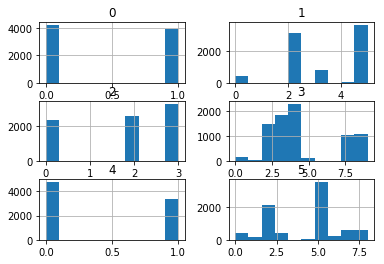

In [73]:
pd.DataFrame(orig_data[:,0:6]).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27a483fda0>,
      dtype=object)

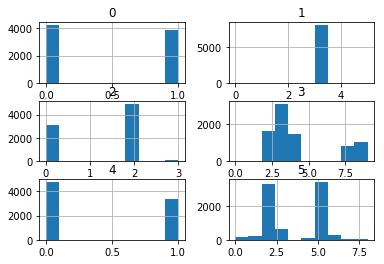

In [75]:
pd.DataFrame(d2[:,0:6]).hist()